In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

%matplotlib inline

In [2]:
gray_img = cv2.imread('old_music_sheet_binary.png', 0)
gray_img = gray_img[350:450, 150:900]
#gray_img = gray_img[350:450, 150:1050]
gray_img[gray_img == 0] = 2
gray_img[gray_img == 255] = 0
gray_img[gray_img == 2] = 1

In [3]:
N = 40
horizontal = np.ones([1,N])
rectangle = np.ones([3,2]) #dependent on the thickness of the 'bars'
vertical = np.ones([1,4])
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))

In [4]:
bars = cv2.erode(gray_img, horizontal)
notes = cv2.erode(gray_img, rectangle)
notes = cv2.dilate(notes, rectangle)
notes_only = cv2.erode(notes, vertical)
blobs = cv2.morphologyEx(notes_only, cv2.MORPH_CLOSE, ellipse)

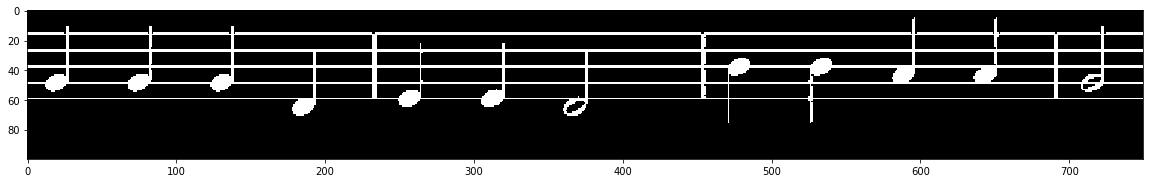

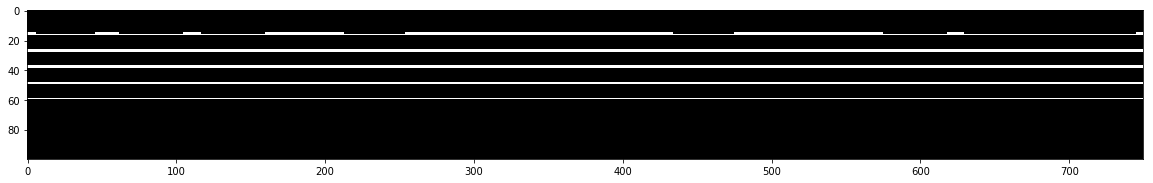

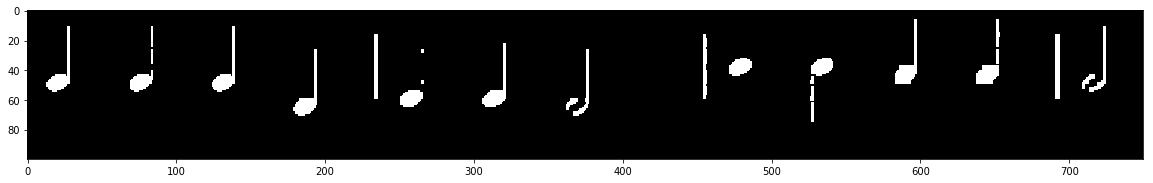

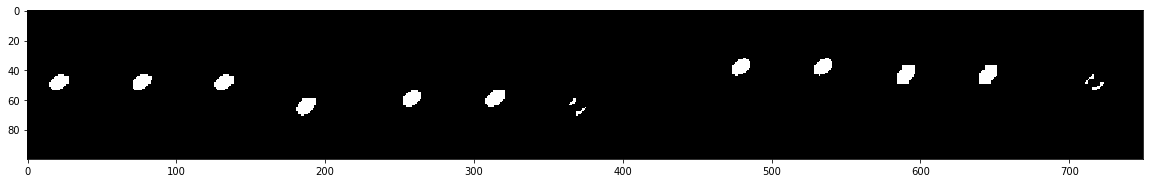

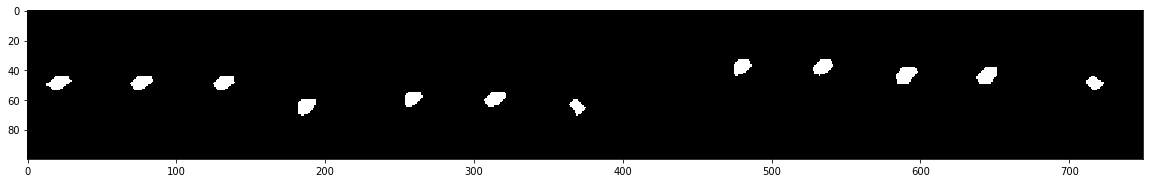

In [6]:
plt.figure(figsize=(20,50))
plt.imshow(gray_img, cmap='gray')
plt.show()

plt.figure(figsize=(20,50))
plt.imshow(bars, cmap='gray')
plt.show()

plt.figure(figsize=(20,50))
plt.imshow(notes, cmap='gray')
plt.show()

plt.figure(figsize=(20,50))
plt.imshow(notes_only, cmap='gray')
plt.show()

plt.figure(figsize=(20,50))
plt.imshow(blobs, cmap='gray')
plt.show()

In [7]:
blobs_1D = np.array(list(map(sum, zip(*blobs))))

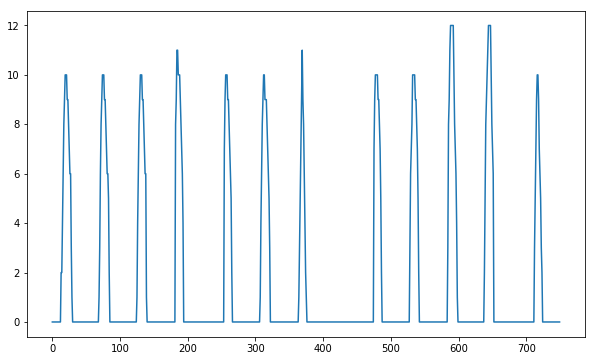

In [8]:
plt.figure(figsize=(10,6))
plt.plot(blobs_1D)
plt.show()

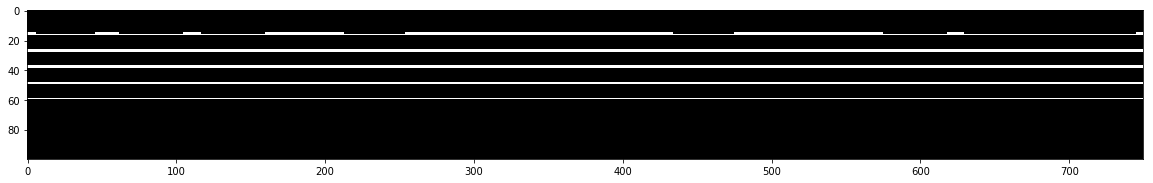

In [9]:
plt.figure(figsize=(20,50))
plt.imshow(bars, cmap='gray')
plt.show()

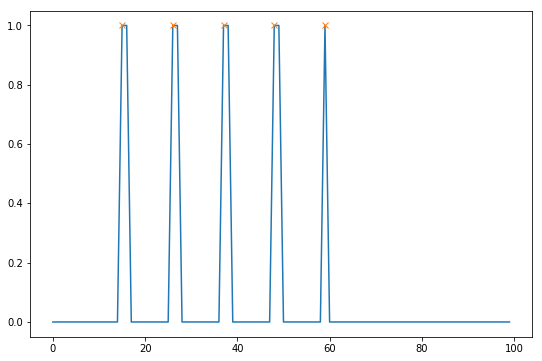

In [10]:
from scipy.signal import find_peaks
x = bars[:,1]
peaks, _ = find_peaks(x, height=0)
plt.figure(figsize=(9,6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

In [19]:
frequency = peaks
frequency

array([15, 26, 37, 48, 59])

In [12]:
import argparse
import imutils
import cv2

In [27]:
cnts = cv2.findContours(blobs.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [30]:
cX = []
cY = []
area = []
for c in cnts:
    M = cv2.moments(c)
    area.append(cv2.contourArea(c))
    cX.append(int(M["m10"] / M["m00"]))
    cY.append(int(M["m01"] / M["m00"]))

In [73]:
def sortSecond(val):
    return val[0]

time_value = 0.6
values = list(zip(cX,cY,area))
values.sort(key = sortSecond)
time = []
for i in values:
    if i[2] < 70:
        time.append(time_value *2)
        
    else:
        time.append(time_value)

In [74]:
values_final = []
for i in range(len(values)):
    values_final.append((values[i][0], values[i][1], values[i][2], time[i]))

In [75]:
values_final

[(21, 48, 92.0, 0.6),
 (76, 48, 91.5, 0.6),
 (131, 48, 87.0, 0.6),
 (186, 64, 85.5, 0.6),
 (258, 59, 76.0, 0.6),
 (314, 59, 87.5, 0.6),
 (369, 64, 53.0, 1.2),
 (479, 37, 80.0, 0.6),
 (534, 37, 87.5, 0.6),
 (590, 43, 107.5, 0.6),
 (644, 43, 105.0, 0.6),
 (717, 48, 62.5, 1.2)]

In [76]:
frequency

array([15, 26, 37, 48, 59])

In [98]:
def find_note(x):
    multiplier = 1
    if x[1] == 15 or x[1] == 16:
        print("F")
        return 698.46 * multiplier
    if x[1] == 20 or x[1] == 21:
        print("E")
        return 659.25 * multiplier
    if x[1] == 26 or x[1] == 27:
        print("D")
        return 587.33 * multiplier
    if x[1] == 31 or x[1] == 32:
        print("C")
        return 523.25 * multiplier
    if x[1] == 37 or x[1] == 36:
        print("B")
        return 493.88 * multiplier
    if x[1] == 42 or x[1] == 43:
        print("A")
        return 440.0 * multiplier
    if x[1] == 48 or x[1] == 49:
        print("G")
        return 392.00 * multiplier
    if x[1] == 53 or x[1] == 54:
        print("F")
        return 349.23 * multiplier
    if x[1] == 59 or x[1] == 60:
        print("E")
        return 329.63 * multiplier
    if x[1] == 64 or x[1] == 65:
        print("D")
        return 293.66 * multiplier
    if x[1] ==70 or x[1] == 71:
        print("C")
        return 261.63 * multiplier

In [99]:
time = 0.6 #seconds
frequency_values = []
for x in values_final:
    frequency_values.append((find_note(x)))

G
G
G
D
E
E
D
B
B
A
A
G


In [100]:
frequency_values

[392.0,
 392.0,
 392.0,
 293.66,
 329.63,
 329.63,
 293.66,
 493.88,
 493.88,
 440.0,
 440.0,
 392.0]

In [101]:
sound = []
rate = 22050  # samples per second
for i in range(int(len(frequency_values))):
    T = values_final[i][3]     # sample duration (seconds)
    f = frequency_values[i] # sound frequency (Hz)
    t = np.linspace(0, T, T*rate, endpoint=False)
    sound.append(np.sin(2*np.pi * f * t))
    print(i)
#for i in range(int(len(notes2))):
#    T = notes2[i][2]     # sample duration (seconds)
#    f = freqs2[i] # sound frequency (Hz)
#    t = np.linspace(0, T, T*rate, endpoint=False)
#    sound.append(4-i%2 * np.sin(2*np.pi * f * t))

0
1
2
3
4
5
6
7
8
9
10
11


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [114]:
import wavio
wavio.write("old_mcdonald.wav", np.concatenate(np.array(sound)), rate, sampwidth=3)